![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

**Задача** — провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean.csv to movies_clean.csv


{'movies_clean.csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Shawshank Redemption,15,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"(\'Tim Robbins\',), (\'Morgan Freeman\',), (\'Bob Gunton\',), (\'William Sadler\',)","26,26,905",$28.34M,142,28.34\n1,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.",Ertem Egilmez,"(\'Kemal Sunal\',), (\'M\xc3\xbcnir \xc3\x96zkul\',), (\'Halit Ak\xc3\xa7atepe\',), (\'Tarik Akan\',)","40,492",,87,\n2,https://m.media-ama

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('movies_clean.csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,28.34
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87,NaN
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,134.97
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",$57.30M,202,57.30
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Schindler's List,15,195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"('Liam Neeson',), ('Ralph Fiennes',), ('Ben Ki...","13,33,407",$96.90M,195,96.90


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4970 non-null   int64  
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 504.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print(f'Наибольший доход: ${max_value}M, Наименьший доход: ${min_value}M')

Наибольший доход: $936.66M, Наименьший доход: $0.0M


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
540,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
736,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1381,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1453,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1567,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
2120,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3153,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3332,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0
3638,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",$0.00M,97,0.0


In [ ]:
dataset[dataset['gross_earn_clear']==0.0].shape[0]

16

Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print(f'Наибольший доход: ${max_value}M, Наименьший доход: ${min_value}M')

Наибольший доход: $936.66M, Наименьший доход: $0.01M


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = gross_earn.mean()
print(f'Средний доход с фильма: ${mean_value:.2f}M')

Средний доход с фильма: $49.08M


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = gross_earn.median()
print(f'Медиана доходов фильмов: ${median_value:.2f}M')

Медиана доходов фильмов: $28.34M


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.1)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.5)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.9)
print(f'10-й процентиль доходов фильмов: ${percentile_10_value:.2f}M')
print(f'25-й процентиль доходов фильмов: ${percentile_25_value:.2f}M')
print(f'50-й процентиль доходов фильмов: ${percentile_50_value:.2f}M')
print(f'75-й процентиль доходов фильмов: ${percentile_75_value:.2f}M')
print(f'90-й процентиль доходов фильмов: ${percentile_90_value:.2f}M')

10-й процентиль доходов фильмов: $0.80M
25-й процентиль доходов фильмов: $7.00M
50-й процентиль доходов фильмов: $28.34M
75-й процентиль доходов фильмов: $63.04M
90-й процентиль доходов фильмов: $121.97M


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

,gross_earn_clear
count,4558.000000
mean,49.078826
std,67.171717
min,0.010000
25%,7.000000
50%,28.345000
75%,63.040000
max,936.660000


Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

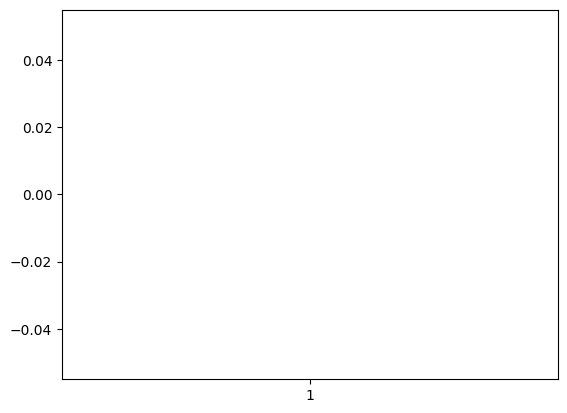

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая.  Это связано с наличием пропущенных значений по признаку.
Очистите клонку от пустых значений с помощью dropna и попробуйте заново построить "ящик с усами"

In [ ]:
gross_earn_without_na = gross_earn.dropna()


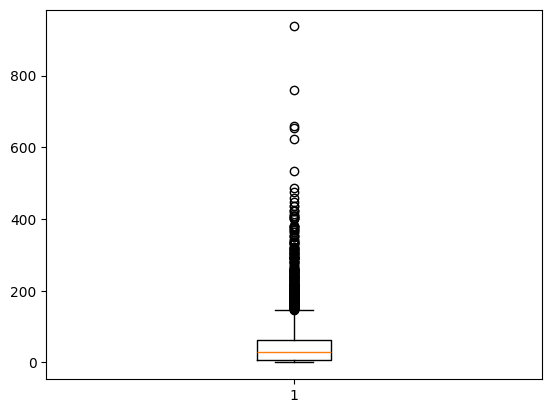

In [ ]:
plt.boxplot(gross_earn_without_na)
plt.show()

<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

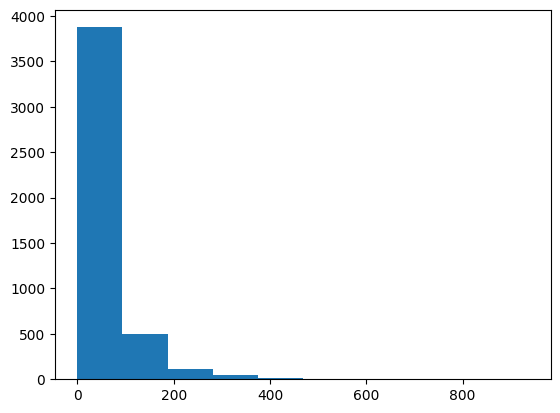

In [ ]:
plt.hist(gross_earn_without_na)
plt.show()

Гистограмма показывает, достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте гистограмму передав в нее параметр bins=20 для лучшей визуализации

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

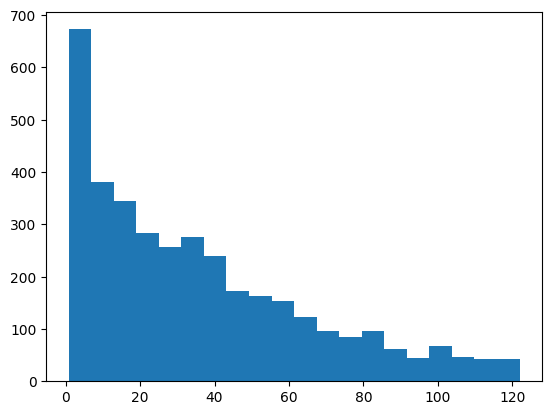

In [ ]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

1.
Максимальное значение *gross\_earn*: \$936.66M.  
Минимальное значение *gross\_earn*: \$0.  
Без учёта нулевых значений, минимальное значение *gross\_earn*: \$0.01M.  

2. В датасете есть нулевые значения данного признака. Таких значений 16. При расчёте статистических величин эти значения не учитывались, потребовалась предобработка.  

3.
Среднее значение *gross\_earn*: \$49.08M.  
Медианное значение *gross\_earn*: \$28.34M.  
Возможное отличие этих величин заключается в том, что в датасете есть некоторое количесвто фильмов, у которых очень большой доход. Это видно на диаграмме boxplot. Поэтому среднее значение сильно повышается за счёт таких фильмов.    

4.
У 10% данных значение *gross\_earn* не превышает: \$0.80M.  
У 25% данных значение *gross\_earn* не превышает: \$7.00M.  
У 50% данных значение *gross\_earn* не превышает: \$28.34M.  
У 75% данных значение *gross\_earn* не превышает: \$63.04M.  
У 90% данных значение *gross\_earn* не превышает: \$121.97M.

5.
В результате графического анализа с помощью boxplot было определено, что в датасете существует некоторое количество фильмов с высоким доходом в несколько сотен миллионов долларов. Число таких фильмов не очень велико. При построении гистограммы такие фильмы на ней не были видны. Поэтому при построении гистограммы использовались только фильмы, находящиеся между 10-м и 90-м процентилем. На гистограмме видно, что большое количество фильмов имеют доход до \$5M. С ростом дохода фильмов, количество таких фильмов убывает. Можно предположить, что количество фильмов с некоторым доходом обратно пропорционально доходу.

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [ ]:
runtime = dataset['runtime_clear']

In [ ]:
runtime.isna().sum()

0

In [ ]:
max_value_runtime = runtime.max()
min_value_runtime = runtime.min()
print(f'Наибольшая продолжительность: {max_value_runtime} мин., Наименьшая продолжительность: {min_value_runtime} мин.')

Наибольшая продолжительность: 366 мин., Наименьшая продолжительность: 45 мин.


In [ ]:
mean_value_runtime = runtime.mean()
print(f'Средняя продолжительность фильма: {mean_value_runtime:.0f} мин.')

Средняя продолжительность фильма: 110 мин.


In [ ]:
median_value_runtime = runtime.median()
print(f'Медианная продолжительность фильма: {median_value_runtime:.0f} мин.')

Медианная продолжительность фильма: 106 мин.


In [ ]:
percentile_10_value_runtime = runtime.quantile(0.1)
percentile_25_value_runtime = runtime.quantile(0.25)
percentile_50_value_runtime = runtime.quantile(0.5)
percentile_75_value_runtime = runtime.quantile(0.75)
percentile_90_value_runtime = runtime.quantile(0.9)
print(f'10-й процентиль продолжительности фильмов: {percentile_10_value_runtime:.0f} мин.')
print(f'25-й процентиль продолжительности фильмов: {percentile_25_value_runtime:.0f} мин.')
print(f'50-й процентиль продолжительности фильмов: {percentile_50_value_runtime:.0f} мин.')
print(f'75-й процентиль продолжительности фильмов: {percentile_75_value_runtime:.0f} мин.')
print(f'90-й процентиль продолжительности фильмов: {percentile_90_value_runtime:.0f} мин.')

10-й процентиль продолжительности фильмов: 89 мин.
25-й процентиль продолжительности фильмов: 96 мин.
50-й процентиль продолжительности фильмов: 106 мин.
75-й процентиль продолжительности фильмов: 120 мин.
90-й процентиль продолжительности фильмов: 135 мин.


In [ ]:
runtime.describe()

,runtime_clear
count,4970.000000
mean,110.267606
std,21.441886
min,45.000000
25%,96.000000
50%,106.000000
75%,120.000000
max,366.000000


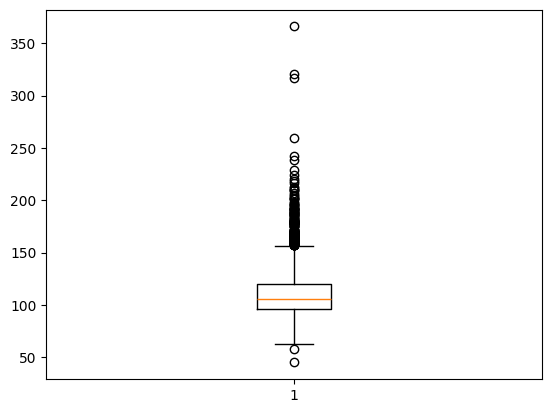

In [ ]:
plt.boxplot(runtime)
plt.show()

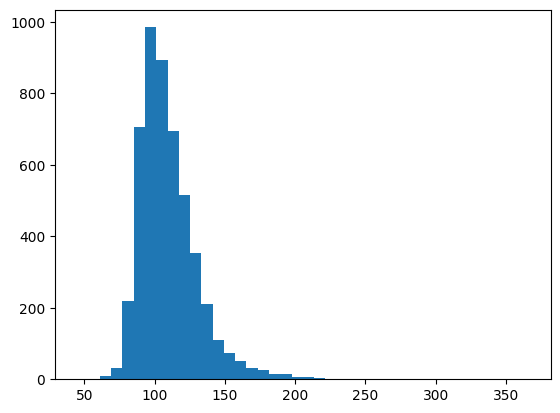

In [ ]:
plt.hist(runtime, bins=40)
plt.show()

In [ ]:
runtime_2 = dataset[
    (dataset['runtime_clear']>=80)&
    (dataset['runtime_clear']<=144)]['runtime_clear']

In [ ]:
runtime_count = runtime.value_counts()
total_runtime_count = runtime_count.sum()
runtime_percent = runtime_count / total_runtime_count * 100
runtime_percent_sorted = runtime_percent.sort_index()

In [ ]:
runtime_percent_sorted[runtime_percent_sorted >= 0.3]

,count
runtime_clear,
80,0.321932
81,0.482897
82,0.482897
83,0.744467
84,0.965795
...,...
140,0.462777
141,0.342052
142,0.382294


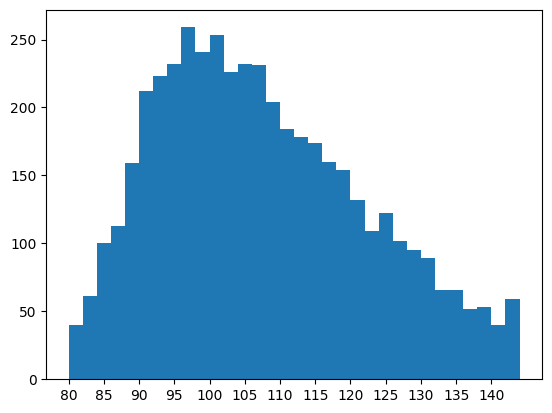

In [ ]:
plt.hist(runtime_2, bins=32)
plt.xticks(ticks=list(range(80, 145, 5)))
plt.show()

1.
Максимальное значение *runtime*: 45 мин.  
Минимальное значение *runtime*: 366 мин.     

2. В датасете нет фильмов с нулевой продолжительностью, поэтому предобработка не требуется.  

3.
Среднее значение *runtime*: 110 мин.  
Медианное значение *runtime*: 106 мин.  
Различие между средним и медианным значением существует, но оно не очень большое. Это указывает на то, что выбросы в датасете не очень большие.  

4.
У 10% данных значение *runtime* не превышает: 89 мин.  
У 25% данных значение *runtime* не превышает: 96 мин.  
У 50% данных значение *runtime* не превышает: 106 мин.  
У 75% данных значение *runtime* не превышает: 120 мин.  
У 90% данных значение *runtime* не превышает: 135 мин.

5.
В результате графического анализа с помощью boxplot было определено, что в датасете существует 4 фильма с продолжительностью 250 мин. и более. Остальные фильмы имеют меньшую продолжительность. Причём значения между 150 мин. и 250 мин. - это выбросы, число таких фильмов не очень велико. Видно, что разброс данных по этому признаку не очень большой. При построении гистограммы были проанализированы фильмы с продолжительностью от 80 мин. до 144 мин. Такие пределы были выбраны, для большей наглядности. Видно, что большинство фильмов имеют продолжительность около 95 мин. Фильмов с меньшей и большей продолжительностью меньше. Причём количество фильмов быстрее спадает при уменьшении продолжительности, чем при её увеличении.

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

,certificate
count,4970
unique,15
top,15
freq,1843


Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['15', '12A', 'X', 'U', '18', 'PG', '12', 'A', 'AA', 'R',
       'Not Rated', 'Rejected', 'UA', 'PG-13', '(Banned)'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

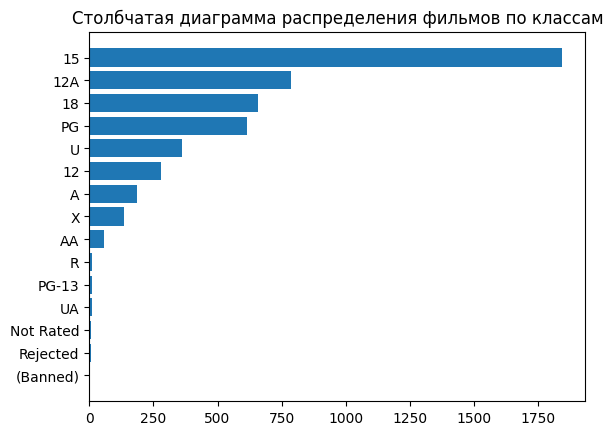

In [ ]:
plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

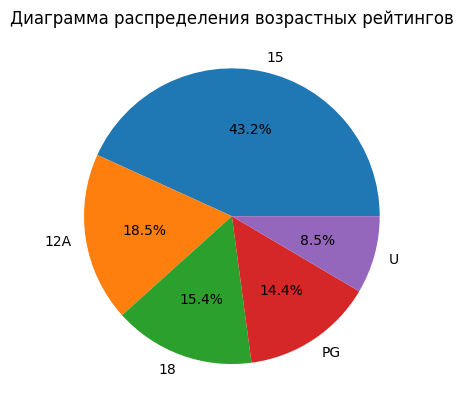

In [ ]:
plt.pie(certificate_counts_top_5.values, labels=certificate_counts_top_5.index, autopct='%.1f%%')
plt.title('Диаграмма распределения возрастных рейтингов')
plt.show()

In [ ]:
certificate_counts_top_5.index

Index(['15', '12A', '18', 'PG', 'U'], dtype='object', name='certificate')

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

1. Для данного признака есть 15 уникальных значений
2. Наиболее часто встречаемое значение признака: 15. Оно встречается 1843 раза
3. 5 наиболее встречаемых значений признака: 15, 12A, 18, PG, U. Наименее встречаемые признаки: R, PG-13, UA, Not Rated, Rejected, (Banned).
4. Столбачатая диаграмма показывает, что большинство фильмов имеет рейтинг 15, следующий по частоте встречаемости рейтинг: 12A, количество таких фильмов меньше практически в 2 раза. Рейтинги 18, PG, U, 12 встречаются меньше, но их количество сравнимо. Далее идут уже менее встречаемые рейтинги. Это объясняется тем, что данные рейтинги являются устаревшими, и они есть только у старых фильмов. Круговая диаграмма показывает распределение 5 самых встречающихся рейтинга. Практически половина - это рейтинг 15, рейтинги 12A, 18, PG имеют примерно одинаковую встречаемость, рейтинг U встречается уже меньше.

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

In [ ]:
dataset['rating'].describe()

,rating
count,4970.000000
mean,6.694004
std,0.967945
min,1.500000
25%,6.100000
50%,6.800000
75%,7.400000
max,9.300000


In [ ]:
dataset['rating'].median()

6.8

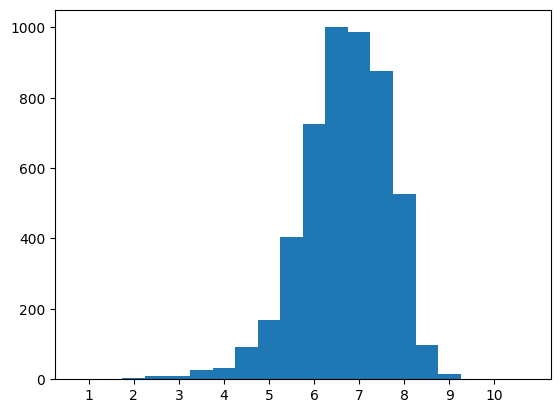

In [ ]:
plt.hist(dataset['rating'], bins = [0.75 + 0.5*i for i in range(21)])
plt.xticks(ticks=list(range(1, 11, 1)))
plt.show()

In [ ]:
dataset['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.1, 3. , 2.9, 2.8, 2.6,
       2.5, 2.4, 2.3, 2.2, 2.1, 1.9, 1.5])

In [ ]:
dataset['rating'].nunique()

72

Так как число различных оценок слишком большое, чтобы строить их на круговой диаграмме, разделим их на 3 группы: плохие фильмы, средние фильмы, и хорошие фильмы.

In [ ]:
min_rating, max_rating = dataset['rating'].min(), dataset['rating'].max()
rating_step = (max_rating - min_rating)/3
rating_list = [min_rating + rating_step * i for i in range(4)]

In [ ]:
rating_list

[1.5, 4.1, 6.7, 9.3]

Границы для определения качества фильма:  
Плохие фильмы: 1.5 - 4.1  
Средние фильмы: 4.2 - 6.7  
Хорошие фильмы: 6.8 - 9.3


Плохие фильмы

In [ ]:
def category_rating(rating):
  if min_rating <= rating <= rating_list[1]:
    return 'плохой'
  elif rating_list[1] + 0.1 <= rating <= rating_list[2]:
    return 'средний'
  else:
    return 'хороший'

In [ ]:
category = dataset['rating'].apply(category_rating)
category_counts = category.value_counts()

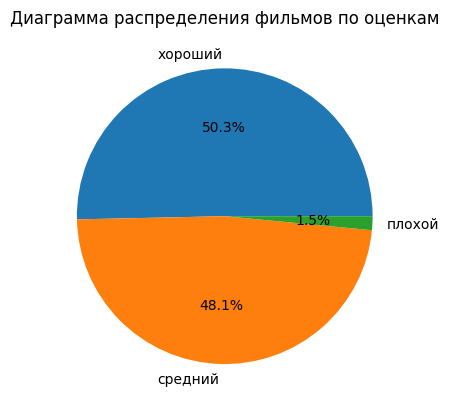

In [ ]:
plt.pie(category_counts.values, labels=category_counts.index, autopct='%.1f%%')
plt.title('Диаграмма распределения фильмов по оценкам')
plt.show()

1. Для данного признака есть 72 уникальных значений
2. Наиболее часто встречаемое значение признака: 6.7. Эта оценка встречается 221 раз.
3. 5 наиболее встречаемых значений признака: 6.7, 6.4, 6.6, 7.2, 7.0. Наименее встречаемые признаки это минимальные(1.5) и максимальные(9.3) оценки и близкие к ним
4. Столбачатая диаграмма показывает, что большинство фильмов имеют оценку около 7. Фильмы были разделены на 3 группы по оценкам плохие(1.5-4.1), средние(4.2-6.7), хорошие(6.8-9.3). На основании такого разделения была построена круговая диаграмма. Из неё видно, что количество средних и хороших фильмов практически одинаково, а количество плохих фильмов очень мало по сравнению с ними.

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



In [ ]:
dataset['director'].describe()

,director
count,4970
unique,1954
top,Woody Allen
freq,38


In [ ]:
dataset['director'].unique()

array(['Frank Darabont', 'Ertem Egilmez', 'Francis Ford Coppola', ...,
       'Roger Christian', 'Vondie Curtis-Hall', 'Tom Putnam'],
      dtype=object)

In [ ]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Clint Eastwood,27
Steven Spielberg,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Sebastian Schipper,1
Jerry Zaks,1
Kinji Fukasaku,1


In [ ]:
(dataset['director'].value_counts() == 1).sum()

1005

In [ ]:
director_counts = dataset['director'].value_counts().sort_values(ascending=True)

Так как число режиссёров очень велико, и большинство имеют 1 или 2 фильма в этом списке, построим столбчатую диаграмму для топ 15 режиссёров по производительности

In [ ]:
director_top15 = dataset['director'].value_counts()[:15].sort_values(ascending=True)

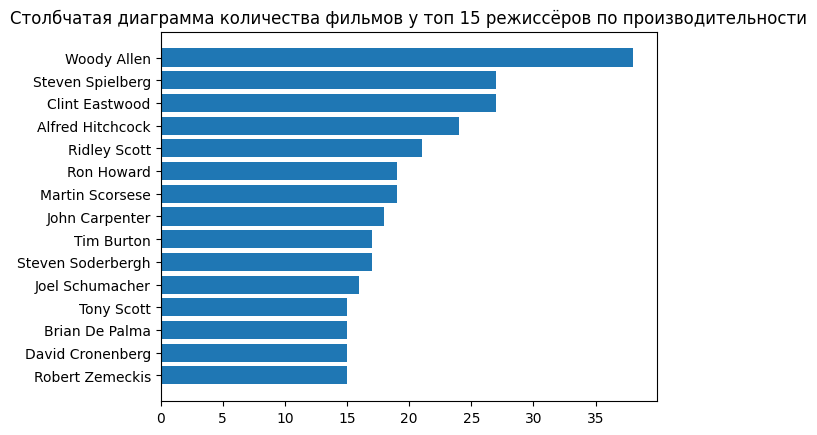

In [ ]:
plt.barh(director_top15.index, director_top15.values)
plt.title('Столбчатая диаграмма количества фильмов у топ 15 режиссёров по производительности')
plt.show()

In [ ]:
director_top5 = dataset['director'].value_counts()[:5]

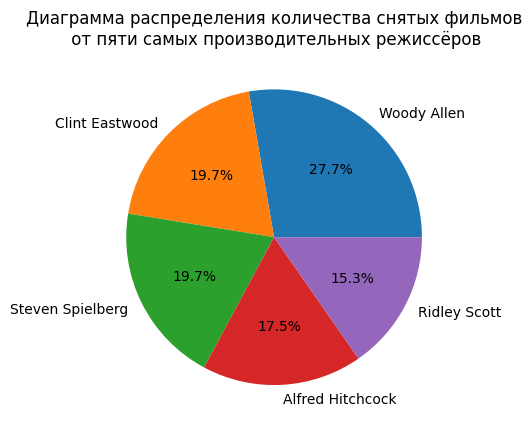

In [ ]:
plt.pie(director_top5.values, labels=director_top5.index, autopct='%.1f%%')
plt.title('Диаграмма распределения количества снятых фильмов\n от пяти самых производительных режиссёров')
plt.show()

1. Для данного признака есть 1954 уникальных значений
2. Наиболее часто встречаемое значение признака: Woody Allen. Этот режиссёр встречается 38 раз.
3. 5 наиболее встречаемых значений признака: Woody Allen, Clint Eastwood, Steven Spielberg, Alfred Hitchcock, Ridley Scott. Наименее встречаемых признаков очень много, так как большинство режиссёров в данном списке имеют 1 фильм, а именно: 1005, почти половина из всех.
4. Столбачатая диаграмма показывает, что большинство фильмов в данном списке имеет режиссёр Woody Allen, далее идут остальные режиссёры. Сначала разница по количеству фильмов меняется больше между соседними режиссёрами, но далее каждый следующий режиссёр имеет в списке почти столько же фильмов сколько и предыдущий. Круговая диаграмма показывает топ 5 самых производительных режиссёров. Среди них почти четверть всех фильмов снял Woody Allen, Clint Eastwood и Steven Spielberg сняли одинаковое число фильмов. Далее чуть меньше сняли Alfred Hitchcock и Ridley Scott. В целом из графического анализа видно, что малое количество режиссёров сняло много фильмов из этого списка, а основное количество режиссёров имеет небольшое количество фильмов.

## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

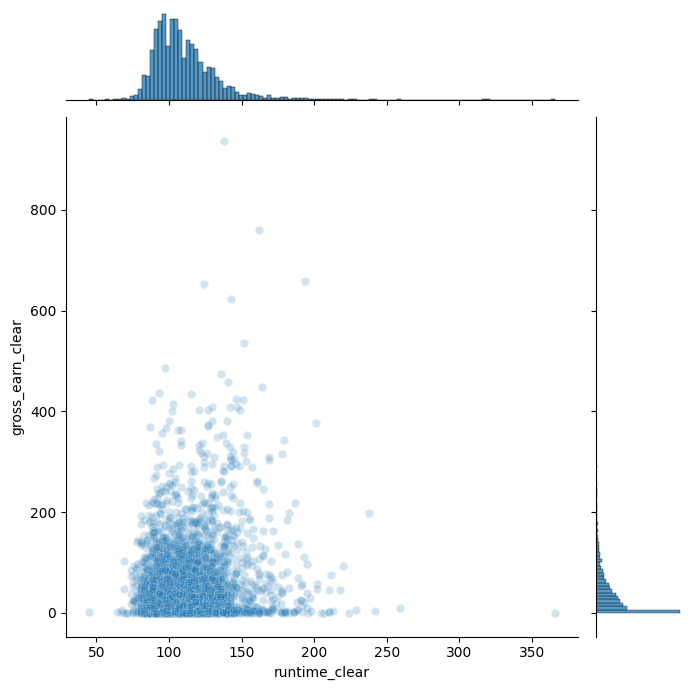

In [ ]:
sns.jointplot(x=dataset['runtime_clear'], y=dataset['gross_earn_clear'], height=7, alpha=0.2)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

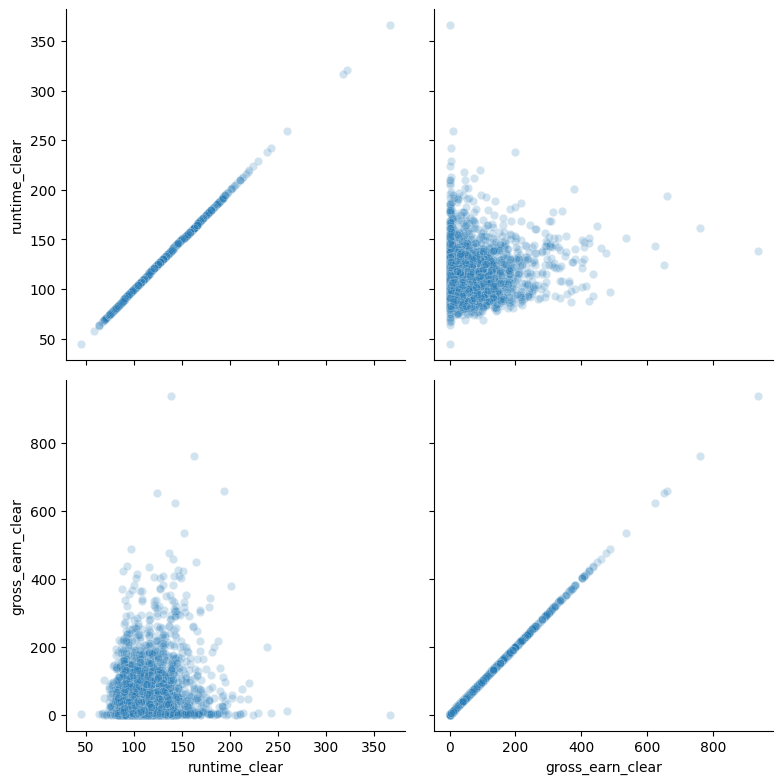

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns], height=4)
g.map(sns.scatterplot, alpha=0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset.copy()
for col in columns:
  limiter = dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col] <= limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

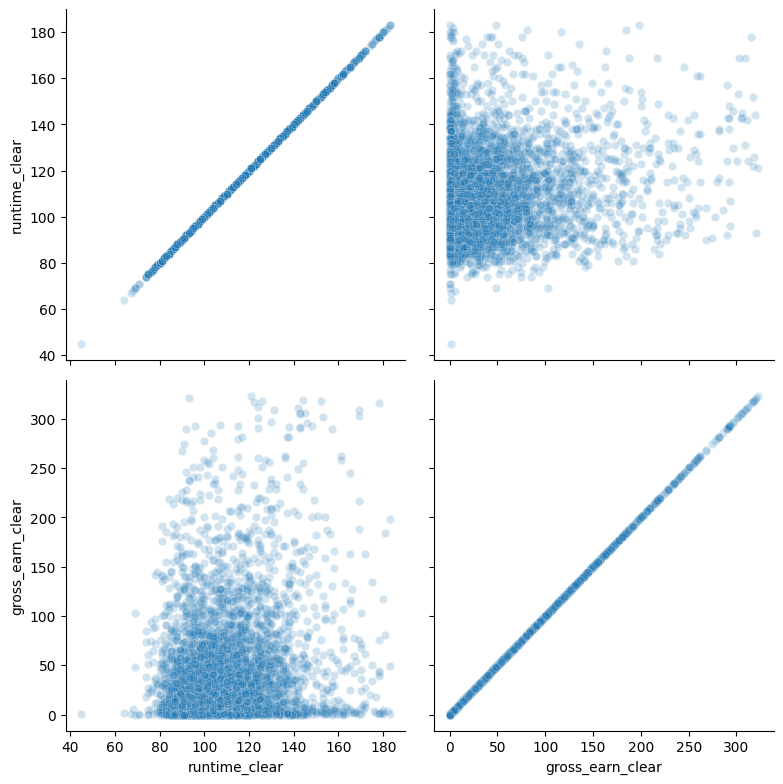

In [ ]:
g = sns.PairGrid(new_dataset[columns], height=4)
g.map(sns.scatterplot, alpha=0.2)

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

1. Явной связи между продолжительностью фильма и сборами фильма нет. Но видно, что для более продолжительных фильмов в среднем сборы меньше. Для очень коротких фильмов тоже в среднем сборы меньше.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Clint Eastwood,27
Steven Spielberg,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Sebastian Schipper,1
Jerry Zaks,1
Kinji Fukasaku,1


Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object', name='director')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels,  plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

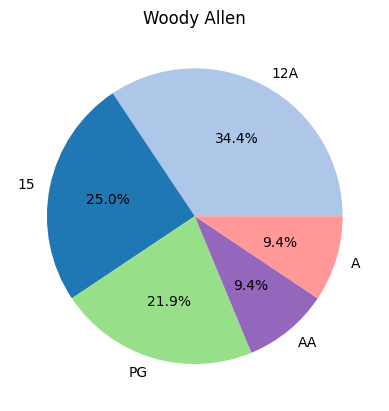

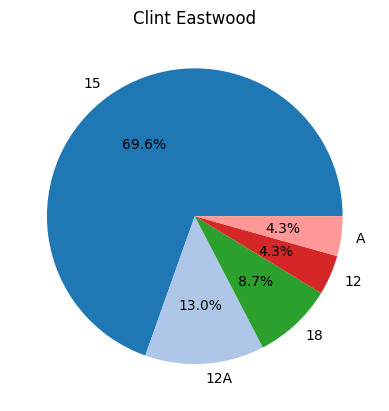

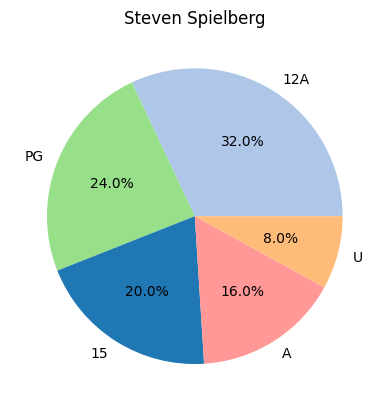

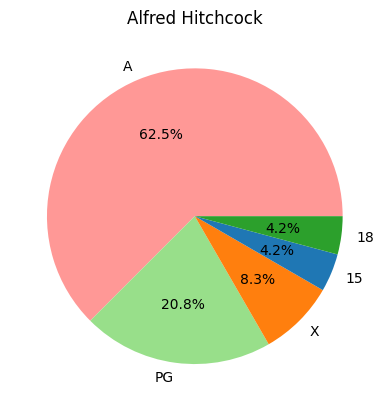

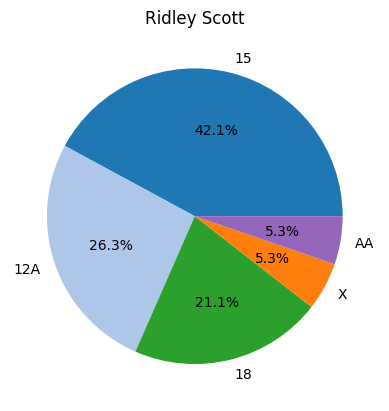

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director'] == director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts.values, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f%%')
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

При анализе диаграмм нужно учитывать, что помимо современных категорий фильмов: U, PG, 12, 12A, 15, 18, есть ещё и устаревшие категории: A(PG), AA(15), X(18). Поэтому у режиссёров, которые выпускали фильмы до изменения системы рейтингов и после, есть разные категории, которые могут обозначать примерно одну и ту же возрастную оценку для фильма.
1. Из диаграмм видно, что у всех режиссёров фильмы с категориями 18 и X в меньшинстве. Самые распространённые категории: 15 и 12A. Это касается всех режиссёров кроме Альфреда Хичкока, у него больше всего фильмов имеют категорию A. Скорее всего это связано с тем, что он снимал кино раньше остальных режиссёров, и в те времена система оценок отличалась от современной. Категория U не представлена ни у кого из режиссёров на данных диаграммах, кроме Стивена Спилберга, но она занимает у него малую часть. Для разных режиссёров распределение категорий довольно разное. У Вуди Аллена и Стивена Спилберга это распределение более равномерное, для остальных режиссёров есть предпочтительные категории.
2.   

Вуди Аллен: самая большая категория - 12А, также существенная часть фильмов имеют категории 15 и PG. Есть фильмы с устаревшими категориями A, AA, которые эквивалентны PG и 15.

Клинт Иствуд: большинство фильмов имеют категорию - 15. Есть некоторое количество фильмов с категориями 12, 12A. Остальные категории имеют малую долю, в том числе фильмы с категорией 18. По сравнению с остальными режиссёрами, у него самая большая доля фильмов с категорией 15.  

Стивен Спилберг: большинство фильмов имеют категорию 12A, также существенную долю составляют фильмы с категориями PG, 15 и A. Есть категория, которая не встречается у других режиссёров U. У данного режиссёра самая большая доля фильмов с категорией PG, чем у остальных. И в целом фильмы пригодны для просмотра для более молодой аудитории, чем у остальных.

Альфред Хичкок: большинство фильмов имеют категорию A. Ни у кого из остальных режиссёров эта категория не является доминирующей. Это связано с тем, что Альфред Хичкок снимал фильмы, когда система оценивания возрастного рейтинга была другая. Также существенную часть составляют фильмы с категорией PG. Есть некоторое количество фильмов для взрослой аудитории(18, X). У данного режиссёра наименьшая доля фильмов с рейтингом 15. Это также может быть связано с тем, что такой категории не было в период в основной работы режиссёра.

Риддли Скотт: почти половина фильмов имеют рейтинг 15, четверть фильмов имеют рейтинг 12A. Также фильмы с категорией 18 и X составляют четверть от всех фильмов. Этот режиссёр с самой большой долей фильмов, предназначенных для взрослой аудитории.





### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

Как и в предыдущем пункте будем исследовать только топ 5 режиссёров по количеству фильмов.

Выведем максимальный и минимальный рейтинг в выборке, а также максимальное количество фильмов для одного рейтинга

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director'] == director]
  rating_counts = df['rating'].value_counts()
  print(rating_counts.index.min(), rating_counts.index.max(), rating_counts.values.max())

6.3 8.0 4
5.9 8.2 3
5.8 9.0 3
6.6 8.5 4
5.4 8.5 3


Для удобства сравнения, строим все диаграммы в промежутке от 5.4 до 9.0

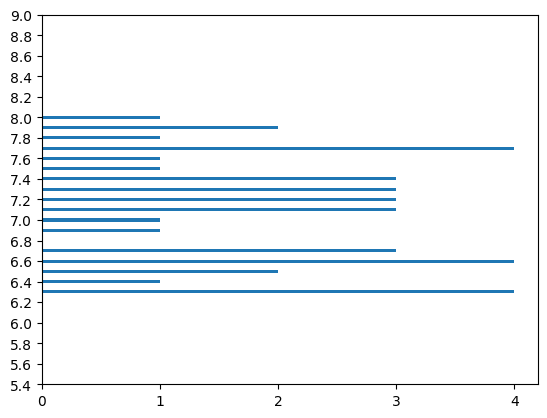

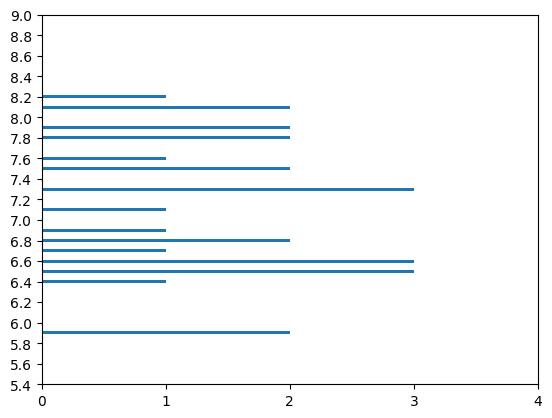

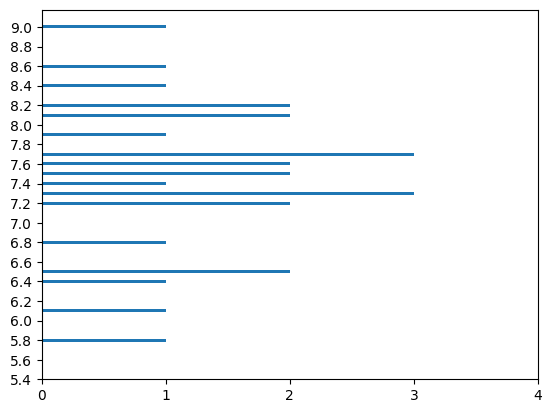

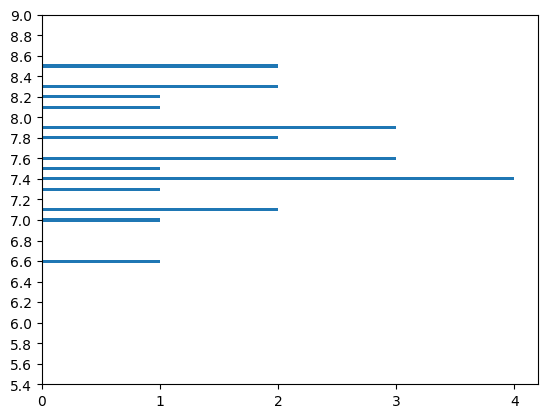

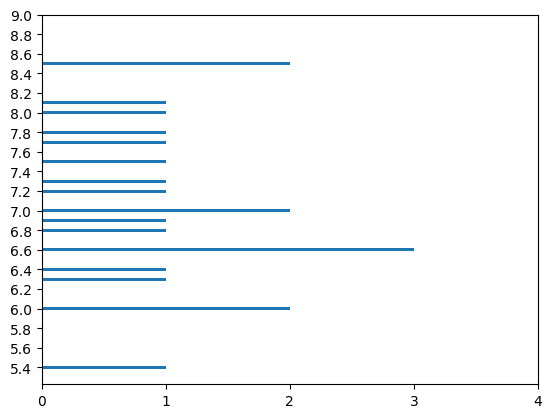

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director'] == director]
  rating_counts = df['rating'].value_counts()
  plt.barh(rating_counts.index, rating_counts.values, height=0.03)
  plt.yticks(ticks=[5.4 + 0.2 * i for i in range(19)])
  plt.xticks(ticks=[0,1,2,3,4])
  plt.show()

Получилось слишком мало фильмов для одного рейтинга и много рейтингов. Поэтому объединим рейтинги в группы:  
 (5.3-5.7)=5.5, (5.8-6.2)=6, (6.3-6.7)=6.5, (6.8-7.2)=7, (7.3-7.7)=7.5, (7.8-8.2)=8, (8.3-8.7)=8.5, (8.8-9.2)=9, (9.3-9.7)=9.5

In [ ]:
def rating_category(rating):
  if 0.3 <= round(rating-int(rating),1) <= 0.7:
    return int(rating) + 0.5
  elif 0.8 <= round(rating-int(rating),1) <= 0.9:
    return int(rating) + 1
  else:
    return int(rating)

In [ ]:
dataset_dir_rating = dataset[['director', 'rating']]
dataset_dir_rating['rating_category'] = dataset_dir_rating['rating'].apply(rating_category)

<ipython-input-135-ffb687fbe7b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_dir_rating['rating_category'] = dataset_dir_rating['rating'].apply(rating_category)


In [ ]:
dataset_dir_rating.head(10)

,director,rating,rating_category
0,Frank Darabont,9.3,9.5
1,Ertem Egilmez,9.2,9.0
2,Francis Ford Coppola,9.2,9.0
3,Francis Ford Coppola,9.0,9.0
4,Steven Spielberg,9.0,9.0
5,Sidney Lumet,9.0,9.0
6,Peter Jackson,9.0,9.0
7,Christopher Nolan,9.0,9.0
8,Quentin Tarantino,8.9,9.0
9,Peter Jackson,8.8,9.0


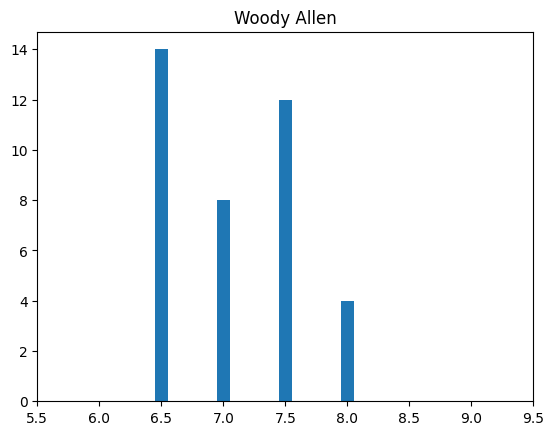

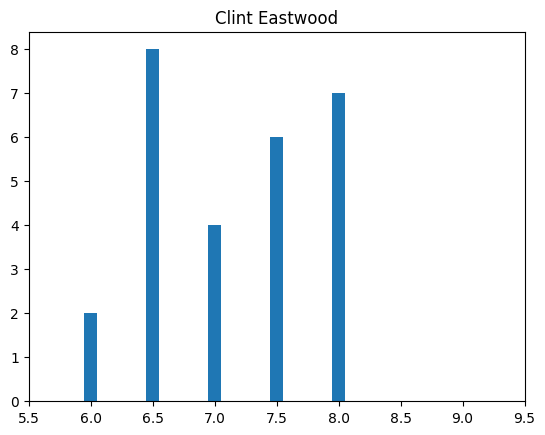

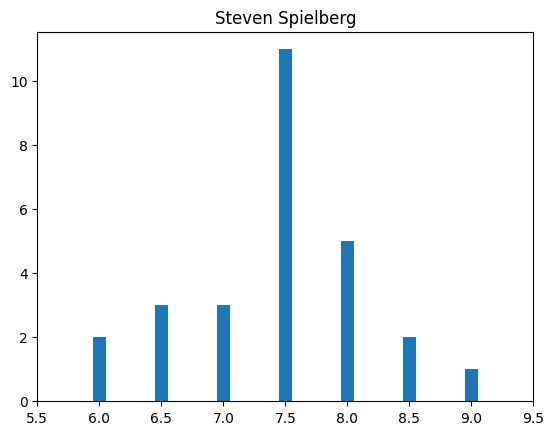

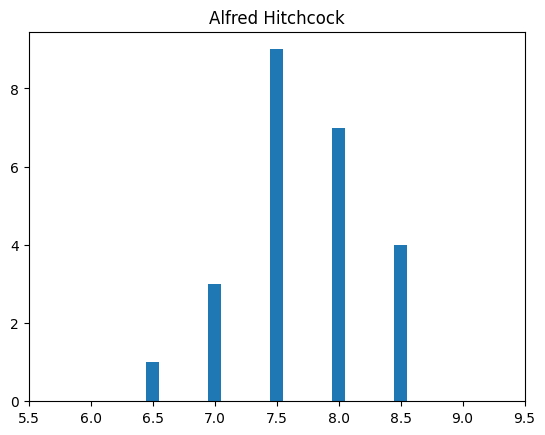

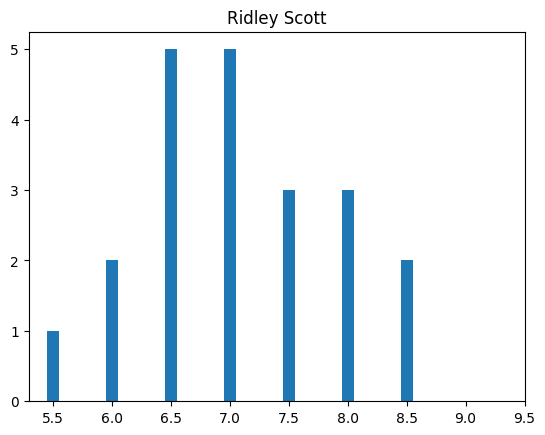

In [ ]:
for director in directors_top_5:
  df = dataset_dir_rating[dataset_dir_rating['director'] == director]
  rating_counts = df['rating_category'].value_counts()
  plt.bar(rating_counts.index, rating_counts.values, width=0.1)
  plt.xticks(ticks=[5.5 + 0.5 * i for i in range(9)])
  plt.title(director)
  plt.show()

1.   Распределения оценок у разных режиссёров довольно разные. Отличается разброс оценок, а также оценка, на которую приходит максимум.

2.  

Вуди Аллен: Малый разброс оценок. Много фильмов с не очень высокими оценками, самое большое количество фильмов имеют оценку 6.5

Клинт Иствуд: Средний разброс оценок. Самое большое количество фильмов при оценке 6.5, но также есть много фильмов с оценкой 7.5 и 8.

Стивен Спилберг: Большой разброс оценок. Большинство фильмов имеют оценку 7.5, фильмов с другими оценками существенно меньше.

Альфред Хичкок: Средний разброс оценок, больше всего фильмов имеют оценку 7.5, также много фильмов с оценкой 8 и 8.5. Фильмов с более низкой оценкой довольно мало. Из выбранных режиссёров, распределение оценок больше всего смещено в сторону высоких

Ридли Скотт: Большой разброс оценок. Большинство фильмов имеют оценку 6.5 и 7. Некоторое количество фильмов с более высокими оценками. Также есть небольшое число фильмов с более низкими оценками. Единственный режиссёр из выборки с оценкой за фильм 5.5.



### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

Проанализируем 5 самых популярных категорий

In [ ]:
dataset_certificate_rating = dataset[dataset['certificate'].isin(certificate_counts_top_5.index)][['certificate', 'rating']]

In [ ]:
dataset_certificate_rating.head(10)

,certificate,rating
0,15,9.3
1,12A,9.2
4,15,9.0
5,U,9.0
6,12A,9.0
7,12A,9.0
8,18,8.9
9,PG,8.8
11,12A,8.8
12,18,8.8


Как и в предыдущем пункте разделим рейтинги на категории

In [ ]:
dataset_certificate_rating['rating_category'] = dataset_certificate_rating['rating'].apply(rating_category)

In [ ]:
dataset_certificate_rating.head()

,certificate,rating,rating_category
0,15,9.3,9.5
1,12A,9.2,9.0
4,15,9.0,9.0
5,U,9.0,9.0
6,12A,9.0,9.0


In [ ]:
dataset_certificate_rating['rating_category'].describe()

,rating_category
count,4266.000000
mean,6.641116
std,0.963769
min,1.500000
25%,6.000000
50%,6.500000
75%,7.500000
max,9.500000


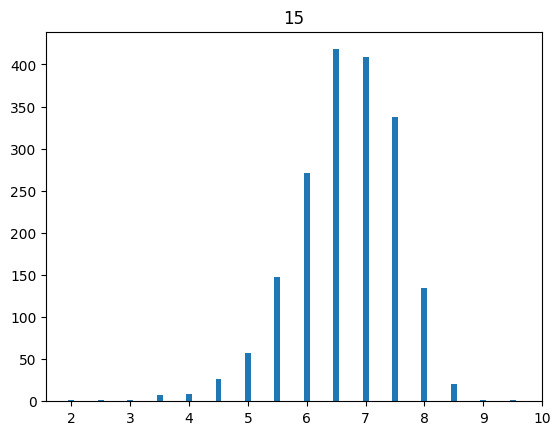

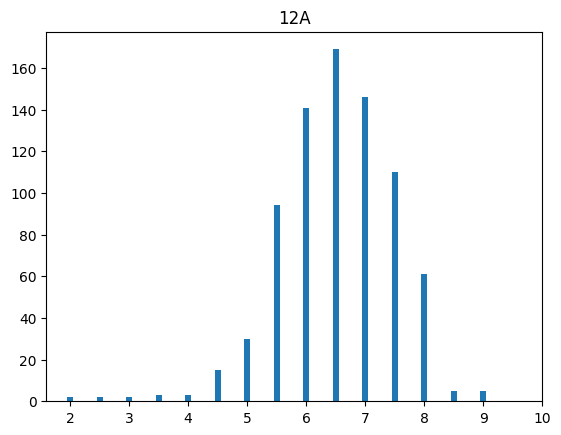

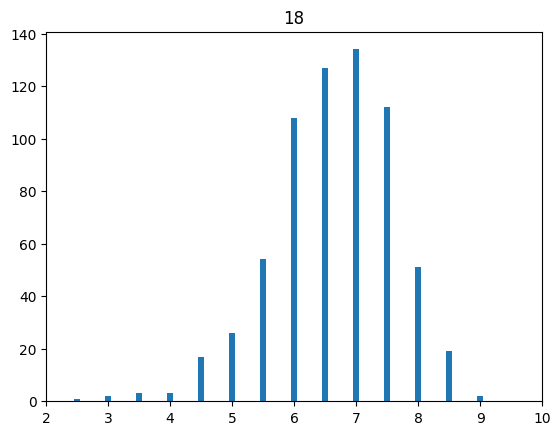

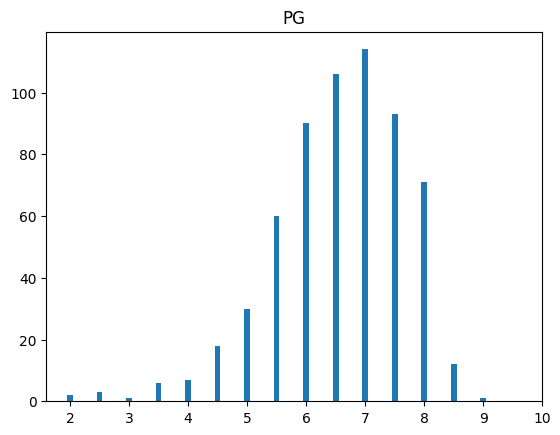

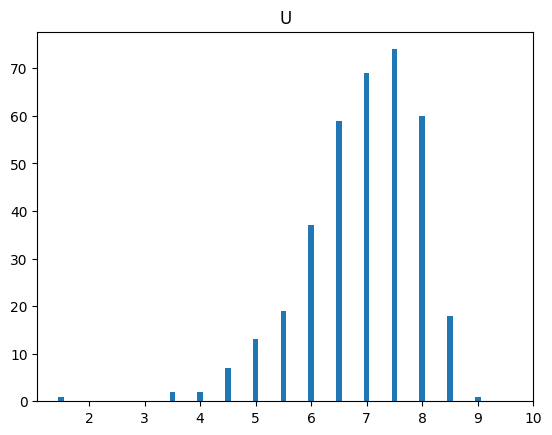

In [ ]:
for certificate in certificate_counts_top_5.index:
  df = dataset_certificate_rating[dataset_certificate_rating['certificate'] == certificate]
  certificate_counts = df['rating_category'].value_counts()
  plt.bar(certificate_counts.index, certificate_counts.values, width=0.1)
  plt.xticks(ticks=[2 + i for i in range(9)])
  plt.title(certificate)
  plt.show()

1. Качественно диаграммы для всех классов выглядят похоже. Есть некоторая оценка, которая стоит у большинства фильмов, количество фильмов с оценкой меньше или больше уменьшается. Но значение этой оценки и разброс оценок отличается для каждого класса. Например для класса U, оценка, на которую приходится больше всего фильмов самая высокая, а для класса 15 и 12A самая низкая.
2.  

15: Оценка с наибольшим количеством фильмов - 6.5, количество фильмов с оценкой 7 почти такое же. Большинство фильмов имеют оценку 5 - 8.

12A: Практически такое же распределение как и у класса 15. Но есть большее количество фильмов с более низкой оценкой.

18: Оценка с наибольшим количеством фильмов - 7. Появляется существенное количество фильмов с оценкой 8.5, в отличие от предыдущих классов.

PG: Практически такое же распределение, как в случае класса 18. Но есть больше фильмов с более низкой оценкой, большой разброс оценок.

U: Оценка с наибольшим количеством фильмов - 7.5, много фильмов с оценкой 8, и некоторое количество с оценкой 8.5. Также есть существенное количество фильмов с более низкой оценкой, распределение похоже на PG, но смещенное вправо.

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].median()

,gross_earn_clear
certificate,
(Banned),NaN
12,41.580
12A,42.650
15,18.840
18,14.945
A,16.140
AA,27.620
Not Rated,0.060
PG,44.340


Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,269.0,60.113048,66.805332,0.04,20.5500,41.580,72.220,659.33
12A,757.0,77.310925,100.261041,0.00,15.2700,42.650,95.000,936.66
15,1719.0,33.451798,42.503809,0.00,3.6100,18.840,45.870,363.07
18,600.0,26.607200,34.639021,0.00,2.5375,14.945,36.875,370.78
A,126.0,37.906190,50.157244,0.01,3.3925,16.140,51.245,260.00
AA,52.0,38.855769,37.479422,0.02,7.2700,27.620,57.635,139.88
Not Rated,5.0,3.830000,8.231376,0.01,0.0200,0.060,0.510,18.55
PG,581.0,64.011360,66.772893,0.01,18.6000,44.340,81.060,402.45


Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

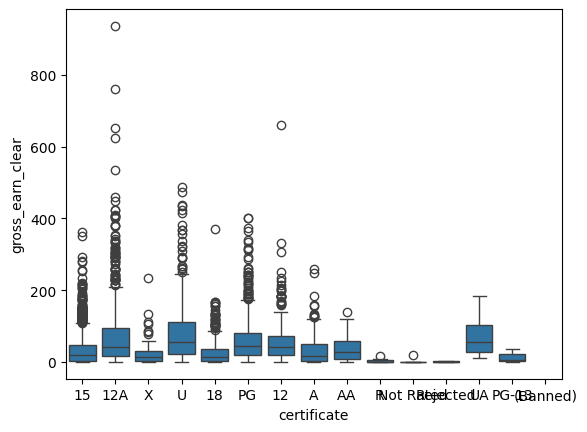

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object', name='certificate')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax (если при очистке признака gross_earn от лишних знаков была сохранена исходная размерность, например, 25.40, то ограничьте значение оси y на отметке 250)

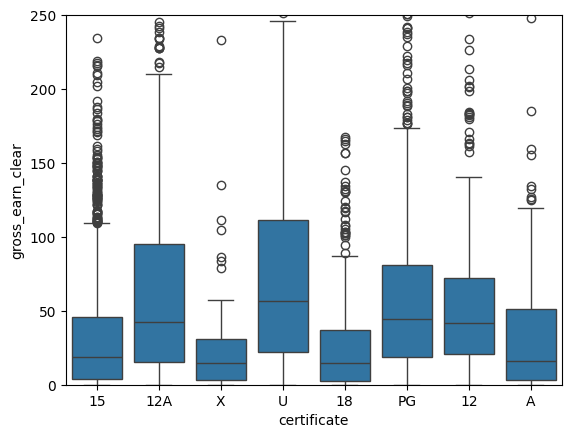

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=250)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

1. Для разных категорий фильмов доход различается. Но есть некоторые схожести. Например распределение для категорий 18 и X распределение похоже. Это связано с тем, что это примерно одни и те же категории, но существовашие в разное время. Также схожесть имеют категории PG, 12, 12A, у них у всех примерно одинаковая медиана, но разброс данных немного различается. Есть схожие категории 15 и A. Категория U отличается от других категорий наибольшим разбросом. Таким образом, видно, что есть связь между категорией фильма и его доходом. Но для некоторых категорий, например U это связь не очень явная, так как существует большой разброс. У категорий также различается количество и величина выбросов. Для фильмов категорий 18, X количество и величина выбросов не такое большое как для других. Самые большие выбросы и их количество у категорий 15, 12A, PG
2. Для категорий X, 18 разброс в доходах самый маленький. Для категорий 15 и A разброс в доходах средний. Далее в порядке увеличения разброса идут категории 12, PG, 12A, U.
3. Фильмы с самым низким значением медианы дохода это фильмы категории 18, X. Далее идут фильмы 15, A. Существенно больший медианный доход имеют фильмы категорий 12, PG, 12A. И самый большой медианный доход имеют фильмы категории U

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

In [ ]:
dataset.groupby('certificate')['runtime_clear'].median()

,runtime_clear
certificate,
(Banned),91.0
12,107.0
12A,112.0
15,106.0
18,104.0
A,110.0
AA,109.0
Not Rated,95.0
PG,105.0


In [ ]:
dataset.groupby('certificate')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),1.0,91.000000,NaN,91.0,91.0,91.0,91.00,91.0
12,278.0,109.982014,18.809794,80.0,97.0,107.0,120.00,194.0
12A,788.0,115.449239,20.309016,75.0,100.0,112.0,127.00,213.0
15,1843.0,109.385241,18.523197,69.0,96.0,106.0,119.00,202.0
18,659.0,109.033384,21.216186,71.0,95.0,104.0,117.00,321.0
A,186.0,114.397849,26.469417,58.0,97.0,110.0,125.75,212.0
AA,59.0,114.949153,24.715920,85.0,98.0,109.0,124.50,205.0
Not Rated,7.0,103.000000,17.406895,87.0,92.0,95.0,110.50,134.0
PG,614.0,110.058632,23.005847,70.0,95.0,105.0,118.00,259.0


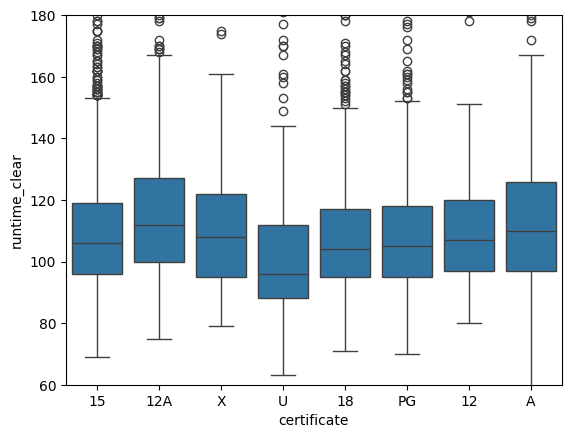

In [ ]:
sns.boxplot(x='certificate', y='runtime_clear', data=dataset_certificate_top_8)
plt.axis(ymin=60, ymax=180)
plt.show()

1. Для разных категорий фильмов длительность различается. Разброс по длительности тоже варьируется у разных категорий. Самый большой разброс наблюдается для фильмов категории A. Самый маленький у фильмов категории 15, 18, 12. Количество и величина выбросов также разное. Самые большие выбросы у категорий 15, 18, PG
2. Каких-то явных особенностей у каждой категории нет, кроме различия в медианной длительности и разбросе. Категория U явно выбивается относительно остальных из-за меньшей медианной длительности.
3. Фильмы с разными категориями имеют разную медианную длительность. Наименьшая у фильмов категории U. Далее идут фильмы категорий 15, 18, PG, 12, A, X. Самая большая длительность у фильмов категории 12A.

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

Рассмотрим только фильмы от топ 5 режиссёров по количеству фильмов

In [ ]:
df_director_top5 = dataset[dataset['director'].isin(directors_top_5)]

In [ ]:
df_director_top5.groupby('director')['gross_earn_clear'].median()

,gross_earn_clear
director,
Alfred Hitchcock,8.75
Clint Eastwood,37.49
Ridley Scott,47.40
Steven Spielberg,132.07
Woody Allen,10.58


In [ ]:
df_director_top5.groupby('director')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
Alfred Hitchcock,15.0,11.280000,10.101461,0.01,5.7500,8.75,12.000,36.76
Clint Eastwood,27.0,59.932593,66.564395,11.80,28.6800,37.49,69.580,350.13
Ridley Scott,21.0,73.781905,63.293615,7.19,32.8700,47.40,108.640,228.43
Steven Spielberg,27.0,156.351481,109.644047,22.24,77.7300,132.07,222.815,435.11
Woody Allen,36.0,14.241667,13.294116,0.72,4.9825,10.58,16.785,56.82


In [ ]:
df_director_top5.groupby('director')['gross_earn_clear'].median()

,gross_earn_clear
director,
Alfred Hitchcock,8.75
Clint Eastwood,37.49
Ridley Scott,47.40
Steven Spielberg,132.07
Woody Allen,10.58


<ipython-input-214-351d75fe0711>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=30)


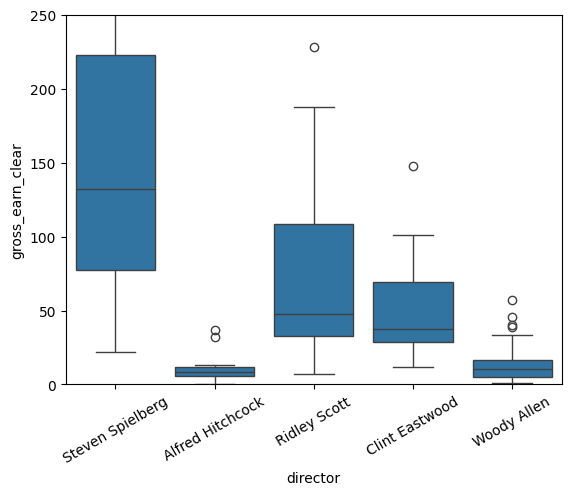

In [ ]:
g = sns.boxplot(x='director', y='gross_earn_clear', data=df_director_top5)
plt.axis(ymin=0, ymax=250)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

1.   Распределения для разных режиссёров существенно различаются. Различаются как медианные значения доходов, так и разброс значений.
2.  

Стивен Спилберг: самое большое медианное значение в выборке и самый большой разброс.

Альфред Хичкок: самое маленькое медианное значение и небольшой разброс. Но есть 2 выброса, доход которых намного больше всех остальных значений.

Ридли Скотт: второе после Стивена Спилберга медианное значение, так же второй по величине разброс значений. Есть 1 выброс

Клинт Иствуд: третье по величине медианное значение и разброс. Есть 2 очень больших выброса (второй не виден).

Вуди Аллен: почти такое же медианное значение, как у Альфреда Хичкока, но разброс больше. Больше всего выбросов.

3.   В порядке убывания величины медианы: Стивен Спилберг, Ридли Скотт, Клинт Иствуд, Вуди Аллен, Альфред Хичкок. У Стивена Спилберга медиана значительно больше остальных, у Ридли Скотта и Клинта Иствуда близкие значения, также близкие значения у Вуди Аллена и Альфреда Хичкока.

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

In [ ]:
df_director_top5.groupby('director')['runtime_clear'].median()

,runtime_clear
director,
Alfred Hitchcock,108.5
Clint Eastwood,132.0
Ridley Scott,129.0
Steven Spielberg,138.0
Woody Allen,96.0


In [ ]:
df_director_top5.groupby('director')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
Alfred Hitchcock,24.0,109.666667,14.208591,80.0,100.5,108.5,119.25,136.0
Clint Eastwood,27.0,128.740741,12.005103,102.0,120.5,132.0,135.50,155.0
Ridley Scott,21.0,131.333333,16.187444,94.0,117.0,129.0,144.00,157.0
Steven Spielberg,27.0,137.333333,20.038425,107.0,122.0,138.0,148.00,195.0
Woody Allen,38.0,97.052632,9.921169,79.0,90.0,96.0,103.75,124.0


In [ ]:
df_director_top5.groupby('director')['runtime_clear'].median()

,runtime_clear
director,
Alfred Hitchcock,108.5
Clint Eastwood,132.0
Ridley Scott,129.0
Steven Spielberg,138.0
Woody Allen,96.0


<ipython-input-219-ab1e06480b17>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=30)


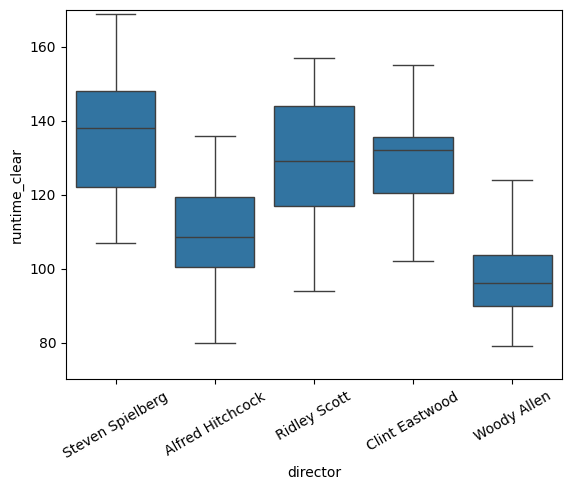

In [ ]:
g = sns.boxplot(x='director', y='runtime_clear', data=df_director_top5)
plt.axis(ymin=70, ymax=170)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

1.   Распределения для разных режиссёров существенно различаются. Различаются как медианные значения продолжительности, так и разброс значений.
2.  

Стивен Спилберг: самое большое медианное значение в выборке. Единственный выброс среди всех режиссёров (не виден на графике)

Альфред Хичкок: предпоследнее медианное значение и третий по разбросу.

Ридли Скотт: третье медианное значение, почти такой же разброс как у Спилберга.

Клинт Иствуд: второе по величине медианное значение. Небольшой разброс.

Вуди Аллен: самое маленькое медианное значение, разброс почти такой же как у Клинта Иствуда.

3.   В порядке убывания величины медианы: Стивен Спилберг, Клинт Иствуд, Ридли Скотт, Альфред Хичкок, Вуди Аллен. У Стивена Спилберга, Клинта Иствуда и Ридли Скотта близкие значения медиан. У Вуди Аллена и Альфреда Хичкока значения меньше и близки.

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

Так как количество уникальных значений признака rating велико, нужно объединить их в группы.

In [ ]:
dataset_rating_earn = dataset[['rating', 'gross_earn_clear']]

In [ ]:
dataset_rating_earn.head(10)

,rating,gross_earn_clear
0,9.3,28.34
1,9.2,NaN
2,9.2,134.97
3,9.0,57.30
4,9.0,96.90
5,9.0,4.36
6,9.0,377.85
7,9.0,534.86
8,8.9,107.93
9,8.8,315.54


In [ ]:
dataset_rating_earn['rating_category'] = dataset_rating_earn['rating'].apply(rating_category)

<ipython-input-165-fcde2e7f487e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_rating_earn['rating_category'] = dataset_rating_earn['rating'].apply(rating_category)


In [ ]:
dataset_rating_earn.head(10)

,rating,gross_earn_clear,rating_category
0,9.3,28.34,9.5
1,9.2,NaN,9.0
2,9.2,134.97,9.0
3,9.0,57.30,9.0
4,9.0,96.90,9.0
5,9.0,4.36,9.0
6,9.0,377.85,9.0
7,9.0,534.86,9.0
8,8.9,107.93,9.0
9,8.8,315.54,9.0


In [ ]:
dataset_rating_earn.groupby('rating_category')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
1.5,1.0,9.110000,NaN,9.11,9.1100,9.110,9.110,9.11
2.0,5.0,9.282000,6.883471,0.03,4.9200,10.250,14.190,17.02
2.5,7.0,16.174286,13.631386,4.27,5.6250,9.350,24.305,39.74
3.0,7.0,23.117143,15.425518,2.41,16.4400,18.990,29.495,48.55
3.5,25.0,27.512000,24.236259,0.13,10.9800,26.280,37.190,107.33
4.0,32.0,40.070312,40.466939,0.12,14.5300,26.660,47.215,166.17
4.5,85.0,39.568118,46.004910,0.00,14.2500,26.640,47.490,296.62
5.0,158.0,42.082595,44.506454,0.01,14.9800,28.075,59.945,300.53
5.5,377.0,43.790716,41.594167,0.00,16.2000,32.100,60.400,292.30


In [ ]:
dataset_rating_earn.groupby('rating_category')['gross_earn_clear'].median()

,gross_earn_clear
rating_category,
1.5,9.110
2.0,10.250
2.5,9.350
3.0,18.990
3.5,26.280
4.0,26.660
4.5,26.640
5.0,28.075
5.5,32.100


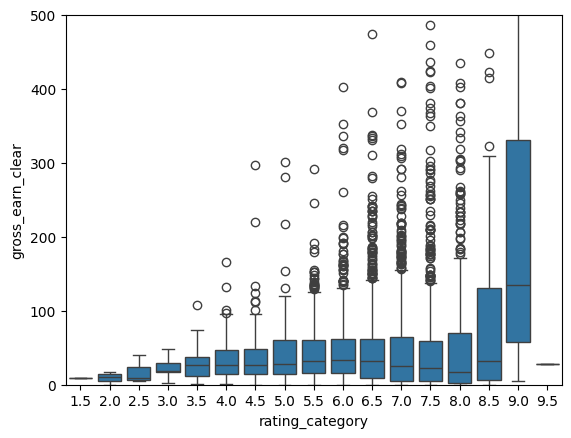

In [ ]:
g = sns.boxplot(x='rating_category', y='gross_earn_clear', data=dataset_rating_earn)
plt.axis(ymin=0, ymax=500)
plt.show()

По некоторым рейтингам слишком мало фильмов, поэтому выберем только рейтинги в диапазоне 4.5 - 8.5

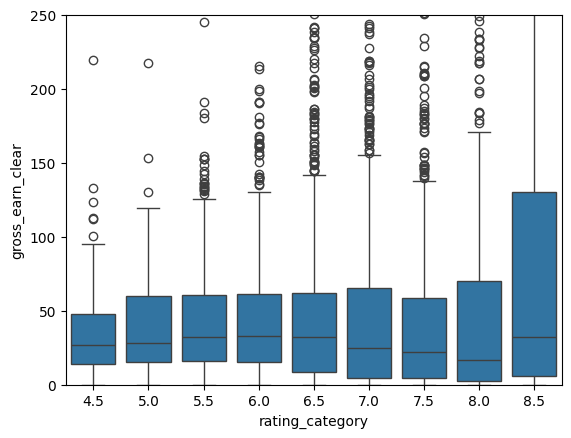

In [ ]:
g = sns.boxplot(x='rating_category', y='gross_earn_clear', data=dataset_rating_earn[(4.5 <= dataset_rating_earn['rating_category']) & (dataset_rating_earn['rating_category'] <= 8.5)])
plt.axis(ymin=0, ymax=250)
plt.show()

Видно, что явной зависимостью между медианным значением рейтинга и доходом нет. Но для более высокорейтинговых фильмов выбросы с большим доходом случаются чаще. Также разброс значений растёт с ростом рейтинга

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

In [ ]:
dataset_rating_runtime = dataset[['rating', 'runtime_clear']]

In [ ]:
dataset_rating_runtime.head(10)

,rating,runtime_clear
0,9.3,142
1,9.2,87
2,9.2,175
3,9.0,202
4,9.0,195
5,9.0,96
6,9.0,201
7,9.0,152
8,8.9,154
9,8.8,178


In [ ]:
dataset_rating_runtime['rating_category'] = dataset_rating_runtime['rating'].apply(rating_category)

<ipython-input-184-3e2033dbb61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_rating_runtime['rating_category'] = dataset_rating_runtime['rating'].apply(rating_category)


In [ ]:
dataset_rating_runtime.head(10)

,rating,runtime_clear,rating_category
0,9.3,142,9.5
1,9.2,87,9.0
2,9.2,175,9.0
3,9.0,202,9.0
4,9.0,195,9.0
5,9.0,96,9.0
6,9.0,201,9.0
7,9.0,152,9.0
8,8.9,154,9.0
9,8.8,178,9.0


In [ ]:
dataset_rating_runtime.groupby('rating_category')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
1.5,1.0,88.000000,NaN,88.0,88.00,88.0,88.00,88.0
2.0,5.0,88.600000,4.929503,81.0,87.00,90.0,91.00,94.0
2.5,8.0,107.750000,22.153684,85.0,94.25,101.5,118.75,152.0
3.0,8.0,93.375000,8.601287,83.0,87.75,94.0,95.75,110.0
3.5,25.0,95.640000,10.065949,80.0,90.00,95.0,101.00,125.0
4.0,33.0,95.272727,12.971779,78.0,87.00,91.0,103.00,127.0
4.5,91.0,97.505495,14.813938,71.0,88.50,94.0,101.00,156.0
5.0,167.0,98.928144,13.535571,80.0,89.00,97.0,104.50,180.0
5.5,405.0,100.908642,13.619986,76.0,92.00,99.0,106.00,175.0


In [ ]:
dataset_rating_runtime.groupby('rating_category')['runtime_clear'].median()

,runtime_clear
rating_category,
1.5,88.0
2.0,90.0
2.5,101.5
3.0,94.0
3.5,95.0
4.0,91.0
4.5,94.0
5.0,97.0
5.5,99.0


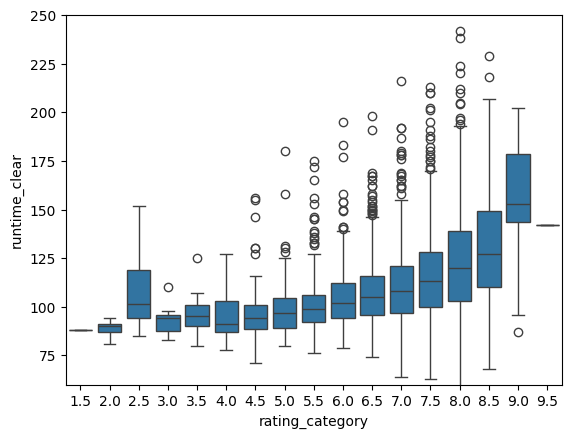

In [ ]:
g = sns.boxplot(x='rating_category', y='runtime_clear', data=dataset_rating_runtime)
plt.axis(ymin=60, ymax=250)
plt.show()

По некоторым рейтингам слишком мало фильмов, поэтому выберем только рейтинги в диапазоне 4.5 - 8.5

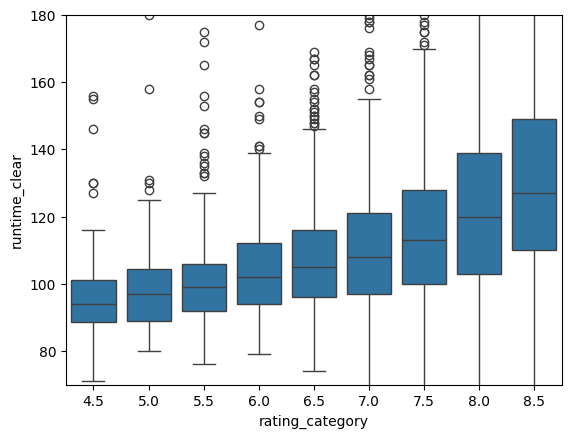

In [ ]:
g = sns.boxplot(x='rating_category', y='runtime_clear', data=dataset_rating_runtime[(4.5 <= dataset_rating_runtime['rating_category']) & (dataset_rating_runtime['rating_category'] <= 8.5)])
plt.axis(ymin=70, ymax=180)
plt.show()

Видна явная зависимость между рейтингом и продолжительностью фильма. Чем больше рейтинг фильма, тем он в среднем продолжительнее. Но при этом разброс по продолжительности растёт с ростом рейтинга. Растёт также число выбросов.

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

В данной выборке 4970 фильма. Анализировались следующие признаки: доход от фильма, режиссёр, продолжительность, рейтинг и возрастной рейтинг. Медианный доход от фильмов составляет \$28.34M. Медианная продолжительность - 106мин. Медианный рейтинг 6.8. Эти показатели говорят о том, что в выборке собраны фильмы в основном с довольно высоким рейтингом и хорошими доходами. Топ 5 режиссёров, которые сняли больше всего фильмов: Стивен Спилберг, Ридли Скотт, Клинт Иствуд, Вуди Аллен, Альфред Хичкок. У каждого режиссёра разное количество фильмов, сятое в каждом классе. Но в остальных признаках, таких как продолжительность и доход, режиссёры Альфред Хичкок и Вуди Аллен довольно похожи, и существенно различаются от остальных режиссёров. Самый распространённый класс фильмов - 15. Самые высокорейтинговые и прибыльные фильмы в основном это фильмы класса U. Они же являются наименее продолжительными среди остальных классов. Наименее прибыльными являются фильмы класса 18 и X для взрослой аудитории. Явной зависимости между рейтингом фильма и количеством заработанных денег нет, но для фильмов с высоким рейтингом больше выбросов, что значит вероятяность получить высокий доход больше, но не гарантирована. В среднем фильмы с более высоким рейтингом более продолжительны, но для более Не было найдено явной зависимости между продолжительностью фильма и его доходом. Но вероятность получить высокий доход у очень коротких или длинных фильмов маленькая.